# fraud detection and analyze

This is a fraud dataset from kagggle
https://www.kaggle.com/datasets/marusagar/bank-transaction-fraud-detection?resource=download

## feature

Customer_ID: A particular identifier for every customer within the bank's system.

Customer_Name: The name of the consumer making the transaction.

Gender: The gender of the consumer (e.G., Male, Female, Other).

Age: The age of the consumer at the time of the transaction.

State: The nation in which the patron resides.

City: The metropolis wherein the client is living.

Bank_Branch: The specific financial institution branch wherein the consumer holds their account.

Account_Type: The kind of account held with the aid of the customer (e.G., Savings, Checking).

Transaction_ID: A particular identifier for each transaction.

Transaction_Date: The date on which the transaction passed off.


Transaction_Time: The specific time the transaction became initiated.

Transaction_Amount: The financial value of the transaction.

Merchant_ID: A particular identifier for the merchant worried within the transaction.

Transaction_Type: The nature of the transaction (e.G., Withdrawal, Deposit, Transfer).

Merchant_Category: The class of the merchant (e.G., Retail, Online, Travel).

Account_Balance: The balance of the customer's account after the transaction.

Transaction_Device: The tool utilized by the consumer to perform the transaction (e.G., Mobile, Desktop).

Transaction_Location: The geographical vicinity (e.G., latitude, longitude) of the transaction.

Device_Type: The kind of device used for the transaction (e.G., Smartphone, Laptop).

Is_Fraud: A binary indicator (1 or zero) indicating whether or not the transaction is fraudulent or now not.

Transaction_Currency: The currency used for the transaction (e.G., USD, EUR).

Customer_Contact: The contact variety of the client.

Transaction_Description: A brief description of the transaction (e.G., buy, switch).

Customer_Email: The e-mail cope with related to the consumer's account.


## Goal: 

### use clustering to identify the property of the people who commit fraud 

### if we know this we could better find out potential fraud behavior and stop it in advance

## setup:

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler,OneHotEncoder,LabelEncoder
from sklearn.cluster import KMeans,DBSCAN
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/sklearn/utils/validation.py:37: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  LARGE_SPARSE_SUPPORTED = LooseVersion(scipy_version) >= '0.14.0'
/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:35: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  eps=np.finfo(np.float).eps,
/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:597: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing th

## EDA:

In [2]:
df=pd.read_csv('fraud.csv')
df

,Customer_ID,Customer_Name,Gender,Age,State,City,Bank_Branch,Account_Type,Transaction_ID,Transaction_Date,...,Merchant_Category,Account_Balance,Transaction_Device,Transaction_Location,Device_Type,Is_Fraud,Transaction_Currency,Customer_Contact,Transaction_Description,Customer_Email
0,d5f6ec07-d69e-4f47-b9b4-7c58ff17c19e,Osha Tella,Male,60,Kerala,Thiruvananthapuram,Thiruvananthapuram Branch,Savings,4fa3208f-9e23-42dc-b330-844829d0c12c,23-01-2025,...,Restaurant,74557.27,Voice Assistant,"Thiruvananthapuram, Kerala",POS,0,INR,+9198579XXXXXX,Bitcoin transaction,oshaXXXXX@XXXXX.com
1,7c14ad51-781a-4db9-b7bd-67439c175262,Hredhaan Khosla,Female,51,Maharashtra,Nashik,Nashik Branch,Business,c9de0c06-2c4c-40a9-97ed-3c7b8f97c79c,11-01-2025,...,Restaurant,74622.66,POS Mobile Device,"Nashik, Maharashtra",Desktop,0,INR,+9191074XXXXXX,Grocery delivery,hredhaanXXXX@XXXXXX.com
2,3a73a0e5-d4da-45aa-85f3-528413900a35,Ekani Nazareth,Male,20,Bihar,Bhagalpur,Bhagalpur Branch,Savings,e41c55f9-c016-4ff3-872b-cae72467c75c,25-01-2025,...,Groceries,66817.99,ATM,"Bhagalpur, Bihar",Desktop,0,INR,+9197745XXXXXX,Mutual fund investment,ekaniXXX@XXXXXX.com
3,7902f4ef-9050-4a79-857d-9c2ea3181940,Yamini Ramachandran,Female,57,Tamil Nadu,Chennai,Chennai Branch,Business,7f7ee11b-ff2c-45a3-802a-49bc47c02ecb,19-01-2025,...,Entertainment,58177.08,POS Mobile App,"Chennai, Tamil Nadu",Mobile,0,INR,+9195889XXXXXX,Food delivery,yaminiXXXXX@XXXXXXX.com
4,3a4bba70-d9a9-4c5f-8b92-1735fd8c19e9,Kritika Rege,Female,43,Punjab,Amritsar,Amritsar Branch,Savings,f8e6ac6f-81a1-4985-bf12-f60967d852ef,30-01-2025,...,Entertainment,16108.56,Virtual Card,"Amritsar, Punjab",Mobile,0,INR,+9195316XXXXXX,Debt repayment,kritikaXXXX@XXXXXX.com
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,b8bdae19-296f-48b7-9104-e055d33a09ac,Vedhika Magar,Female,55,Dadra and Nagar Haveli and Daman and Diu,Diu,Diu Branch,Business,8d856bc7-4666-4509-a067-48d67500694a,08-01-2025,...,Restaurant,37475.11,Desktop/Laptop,"Diu, Dadra and Nagar Haveli and Daman and Diu",ATM,0,INR,+9192629XXXXXX,ATM withdrawal,vedhikaXXXXX@XXXXXXX.com
199996,635bc099-8a93-48ee-829a-bf2283fe8fda,Aashi Pai,Male,51,Manipur,Kangpokpi,Kangpokpi Branch,Business,f2890dbd-4e01-445d-97f5-ac56886e9037,01-01-2025,...,Groceries,53037.20,ATM,"Kangpokpi, Manipur",ATM,0,INR,+9198116XXXXXX,Subscription box,aashiXXX@XXXXXX.com
199997,c1b31cc2-0905-47e8-8cc5-6461d1f3ba33,Dayita Shan,Female,41,Chandigarh,Chandigarh,Chandigarh Branch,Savings,f714b758-7539-474d-b676-5fa7e2480141,28-01-2025,...,Health,96225.36,ATM,"Chandigarh, Chandigarh",Desktop,0,INR,+9192601XXXXXX,Charity donation,dayitaXXXX@XXXXXXX.com
199998,32bb8e66-f3fa-43bf-8242-dab9a6116310,Unnati Vyas,Female,28,Telangana,Nizamabad,Nizamabad Branch,Checking,f6903b6a-b582-47ea-95d5-aff16bdec950,08-01-2025,...,Electronics,89599.90,Voice Assistant,"Nizamabad, Telangana",Desktop,0,INR,+9197537XXXXXX,Tourist attraction payment,unnatiXXX@XXXXX.com


In [3]:
#drop unrelated column
df=df.drop(columns=['Customer_ID','Customer_Name','Transaction_ID','Merchant_ID','Transaction_Currency','Customer_Contact','Customer_Email','Transaction_Date'],axis=1)

In [4]:
df.isnull().sum(axis=0)
# there is no null value in this dataset

Gender                     0
Age                        0
State                      0
City                       0
Bank_Branch                0
Account_Type               0
Transaction_Time           0
Transaction_Amount         0
Transaction_Type           0
Merchant_Category          0
Account_Balance            0
Transaction_Device         0
Transaction_Location       0
Device_Type                0
Is_Fraud                   0
Transaction_Description    0
dtype: int64

In [5]:
df.dtypes

Gender                      object
Age                          int64
State                       object
City                        object
Bank_Branch                 object
Account_Type                object
Transaction_Time            object
Transaction_Amount         float64
Transaction_Type            object
Merchant_Category           object
Account_Balance            float64
Transaction_Device          object
Transaction_Location        object
Device_Type                 object
Is_Fraud                     int64
Transaction_Description     object
dtype: object

In [6]:
df[df['Is_Fraud']==0].describe()

,Age,Transaction_Amount,Account_Balance,Is_Fraud
count,189912.000000,189912.000000,189912.000000,189912.0
mean,44.020457,49551.831380,52437.197166,0.0
std,15.290050,28541.881772,27404.829445,0.0
min,18.000000,10.290000,5000.820000,0.0
25%,31.000000,24877.685000,28723.887500,0.0
50%,44.000000,49517.420000,52373.715000,0.0
75%,57.000000,74326.872500,76148.875000,0.0
max,70.000000,98999.980000,99998.680000,0.0


In [7]:
fraud=df[df['Is_Fraud']==1]
fraud.describe()

,Age,Transaction_Amount,Account_Balance,Is_Fraud
count,10088.000000,10088.000000,10088.000000,10088.0
mean,43.914453,49277.925242,52452.891412,1.0
std,15.265150,28739.518843,27300.467424,0.0
min,18.000000,10.410000,5003.420000,1.0
25%,31.000000,24420.042500,29122.987500,1.0
50%,44.000000,49162.945000,52344.725000,1.0
75%,57.000000,74068.717500,76116.032500,1.0
max,70.000000,98999.020000,99999.950000,1.0


It seems that fraud and not fraud have the similar age, transaction amount and balance

In [8]:
fraud=df[df['Is_Fraud']==1]
fraud['City'].value_counts().sort_values(ascending=False).head(10)

Chandigarh     390
Kavaratti      332
Udaipur        144
Silvassa       108
Daman          101
Port Blair      99
Car Nicobar     97
Jorethang       96
Diu             96
Mokokchung      90
Name: City, dtype: int64

In [9]:
fraud['Bank_Branch'].value_counts().sort_values(ascending=False).head(10)

Chandigarh Branch     390
Kavaratti Branch      332
Udaipur Branch        144
Silvassa Branch       108
Daman Branch          101
Port Blair Branch      99
Car Nicobar Branch     97
Jorethang Branch       96
Diu Branch             96
Mokokchung Branch      90
Name: Bank_Branch, dtype: int64

In [10]:
fraud['Account_Type'].value_counts().sort_values(ascending=False).head(10)

Business    3436
Savings     3349
Checking    3303
Name: Account_Type, dtype: int64

In [11]:
fraud['Transaction_Type'].value_counts().sort_values(ascending=False).head(10)

Transfer        2073
Credit          2048
Debit           2033
Bill Payment    1973
Withdrawal      1961
Name: Transaction_Type, dtype: int64

In [12]:
fraud['Merchant_Category'].value_counts().sort_values(ascending=False).head(10)

Clothing         1734
Groceries        1722
Restaurant       1688
Electronics      1681
Health           1651
Entertainment    1612
Name: Merchant_Category, dtype: int64

As we can observe, fraud happens more in Chandigarh, mostly on business,saving,checking account, on five type, six merchants and using four device equally.

there are many object in our dataset, let's do feature engineering first.

In [13]:
df['Transaction_Time'] = pd.to_datetime(df['Transaction_Time'], format='%H:%M:%S')
df['Transaction_Time']=df['Transaction_Time'].dt.hour
df

,Gender,Age,State,City,Bank_Branch,Account_Type,Transaction_Time,Transaction_Amount,Transaction_Type,Merchant_Category,Account_Balance,Transaction_Device,Transaction_Location,Device_Type,Is_Fraud,Transaction_Description
0,Male,60,Kerala,Thiruvananthapuram,Thiruvananthapuram Branch,Savings,16,32415.45,Transfer,Restaurant,74557.27,Voice Assistant,"Thiruvananthapuram, Kerala",POS,0,Bitcoin transaction
1,Female,51,Maharashtra,Nashik,Nashik Branch,Business,17,43622.60,Bill Payment,Restaurant,74622.66,POS Mobile Device,"Nashik, Maharashtra",Desktop,0,Grocery delivery
2,Male,20,Bihar,Bhagalpur,Bhagalpur Branch,Savings,3,63062.56,Bill Payment,Groceries,66817.99,ATM,"Bhagalpur, Bihar",Desktop,0,Mutual fund investment
3,Female,57,Tamil Nadu,Chennai,Chennai Branch,Business,12,14000.72,Debit,Entertainment,58177.08,POS Mobile App,"Chennai, Tamil Nadu",Mobile,0,Food delivery
4,Female,43,Punjab,Amritsar,Amritsar Branch,Savings,18,18335.16,Transfer,Entertainment,16108.56,Virtual Card,"Amritsar, Punjab",Mobile,0,Debt repayment
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,Female,55,Dadra and Nagar Haveli and Daman and Diu,Diu,Diu Branch,Business,18,98513.74,Credit,Restaurant,37475.11,Desktop/Laptop,"Diu, Dadra and Nagar Haveli and Daman and Diu",ATM,0,ATM withdrawal
199996,Male,51,Manipur,Kangpokpi,Kangpokpi Branch,Business,20,40593.55,Withdrawal,Groceries,53037.20,ATM,"Kangpokpi, Manipur",ATM,0,Subscription box
199997,Female,41,Chandigarh,Chandigarh,Chandigarh Branch,Savings,10,61579.70,Withdrawal,Health,96225.36,ATM,"Chandigarh, Chandigarh",Desktop,0,Charity donation
199998,Female,28,Telangana,Nizamabad,Nizamabad Branch,Checking,6,39488.22,Debit,Electronics,89599.90,Voice Assistant,"Nizamabad, Telangana",Desktop,0,Tourist attraction payment


I will use sample to reduce the time

In [14]:
sample_df = df.sample(frac=0.1, random_state=42)
sample=sample_df.copy().reset_index().drop(['index'],axis=1)
sample_df.shape

(20000, 16)

to simply, we will just do label encoding here

In [15]:
label_encoder=LabelEncoder()
df1=df.copy()

In [16]:
for column in sample_df.select_dtypes('object').columns:
       sample_df[column]=label_encoder.fit_transform(sample_df[column])

In [17]:
sample_df.shape

(20000, 16)

In [18]:
sample_df.head()

,Gender,Age,State,City,Bank_Branch,Account_Type,Transaction_Time,Transaction_Amount,Transaction_Type,Merchant_Category,Account_Balance,Transaction_Device,Transaction_Location,Device_Type,Is_Fraud,Transaction_Description
119737,0,70,19,23,23,1,21,73990.02,0,3,26998.49,10,25,2,0,146
72272,0,27,12,120,120,0,17,34258.19,1,0,16474.66,18,122,3,0,31
158154,0,35,24,110,110,0,0,35041.78,4,5,79427.51,1,112,1,0,81
65426,1,56,5,21,21,2,18,4070.99,3,2,8459.75,5,21,0,0,22
30074,1,22,10,2,2,2,19,13405.23,0,5,71766.34,16,2,3,0,41


since cluster is sensitive to scale we will do scaling

In [19]:
ss=StandardScaler()
sample_ss=ss.fit_transform(sample_df)
sample_ss.shape

/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


(20000, 16)

In [20]:
sample_df=pd.DataFrame(sample_ss,columns=sample.columns)

In [21]:
sample_df.shape

(20000, 16)

do pca to reduce the dimension

In [22]:
pca=PCA(n_components=3)
sample_df=pca.fit_transform(sample_df)
sample_df.shape

(20000, 3)

fit the model and see the result

In [23]:
k = [x for x in np.arange(1, 10)] 
inertia = []

for k_value in k:
    km = KMeans(n_clusters=k_value,n_init=1)
    km.fit(sample_df) 
    inertia.append((k_value, km.inertia_)) 


inertia_df = pd.DataFrame(inertia, columns=['k', 'Inertia'])
print(inertia_df)

   k        Inertia
0  1  105202.750525
1  2   60429.531939
2  3   51580.525349
3  4   43708.165955
4  5   37901.365502
5  6   33397.944230
6  7   30359.208992
7  8   27599.048214
8  9   25387.951569


using elbow method

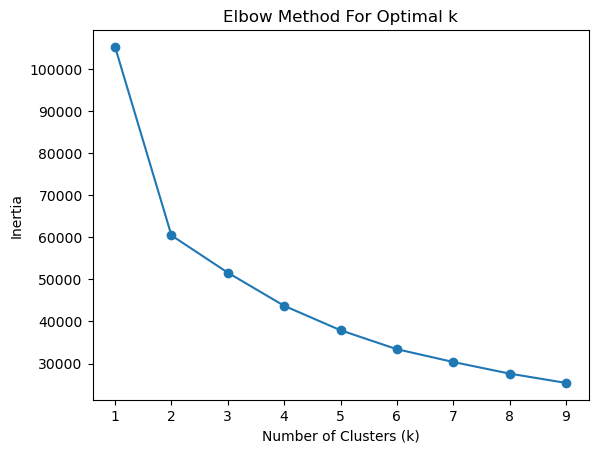

In [24]:
plt.plot(inertia_df['k'], inertia_df['Inertia'], marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

I will choose k=2

In [25]:
kmeans=KMeans(n_clusters=2,random_state=42)
kmeans.fit(sample_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)

In [26]:
label = pd.DataFrame(kmeans.labels_, columns=['k_label'])

In [27]:
sample= pd.concat([sample, label], axis=1)

In [28]:
sample

,Gender,Age,State,City,Bank_Branch,Account_Type,Transaction_Time,Transaction_Amount,Transaction_Type,Merchant_Category,Account_Balance,Transaction_Device,Transaction_Location,Device_Type,Is_Fraud,Transaction_Description,k_label
0,Female,70,Manipur,Churachandpur,Churachandpur Branch,Checking,21,73990.02,Bill Payment,Groceries,26998.49,POS Terminal,"Churachandpur, Manipur",Mobile,0,Subscription fee,1
1,Female,27,Himachal Pradesh,Shimla,Shimla Branch,Business,17,34258.19,Credit,Clothing,16474.66,Wearable Device,"Shimla, Himachal Pradesh",POS,0,Corporate event ticket,0
2,Female,35,Puducherry,Puducherry,Puducherry Branch,Business,0,35041.78,Withdrawal,Restaurant,79427.51,ATM Booth Kiosk,"Puducherry, Puducherry",Desktop,0,Insurance claim,0
3,Male,56,Chandigarh,Chandigarh,Chandigarh Branch,Savings,18,4070.99,Transfer,Entertainment,8459.75,Debit/Credit Card,"Chandigarh, Chandigarh",ATM,0,Childcare expense,1
4,Male,22,Gujarat,Ahmedabad,Ahmedabad Branch,Savings,19,13405.23,Bill Payment,Restaurant,71766.34,Virtual Card,"Ahmedabad, Gujarat",POS,0,Doctor consultation,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,Female,69,Andaman and Nicobar Islands,Car Nicobar,Car Nicobar Branch,Checking,13,31056.71,Bill Payment,Health,5296.41,Tablet,"Car Nicobar, Andaman and Nicobar Islands",POS,0,E-commerce refund,1
19996,Female,42,Andaman and Nicobar Islands,Port Blair,Port Blair Branch,Business,8,14942.40,Debit,Electronics,52448.73,Web Browser,"Port Blair, Andaman and Nicobar Islands",Mobile,0,Grocery shopping,0
19997,Female,28,Uttarakhand,Rishikesh,Rishikesh Branch,Checking,19,87493.47,Bill Payment,Clothing,5036.40,POS Mobile App,"Rishikesh, Uttarakhand",ATM,0,Hospital bill,0
19998,Female,25,Chhattisgarh,Bilaspur,Bilaspur Branch,Savings,17,19137.06,Withdrawal,Restaurant,86131.48,ATM,"Bilaspur, Chhattisgarh",Mobile,0,Gifts for family,1


<AxesSubplot:>

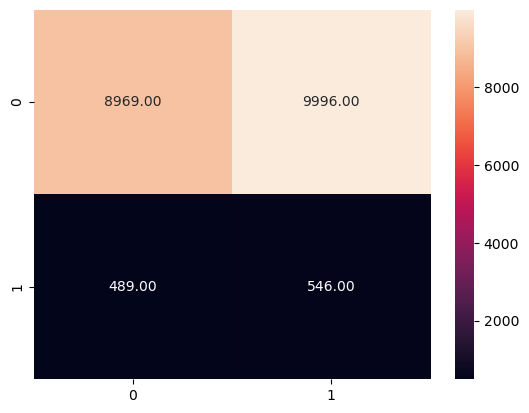

In [29]:
confusion=confusion_matrix(sample['Is_Fraud'], sample['k_label'])
sns.heatmap(confusion,annot=True,fmt='.2f')

using this kmeans with k=2 we see the result might not be reasonable

most of the fraud and nonfraud are assign to the same group 1

might also because I use labelencoder instead of onehotencoder, might also because unbalanced data

let's see what property is related to fraud in the cluster result

<AxesSubplot:>

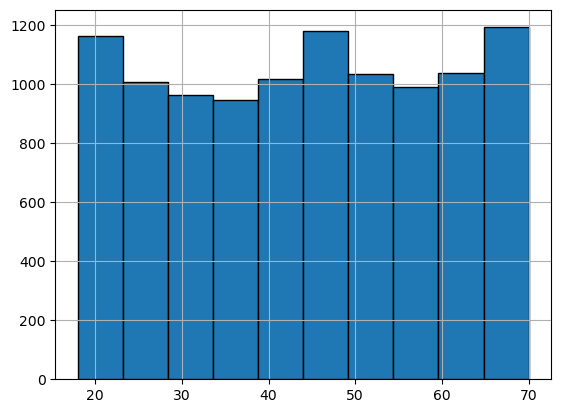

In [30]:
sample[sample['k_label']==1]['Age'].hist(edgecolor='black')

<AxesSubplot:>

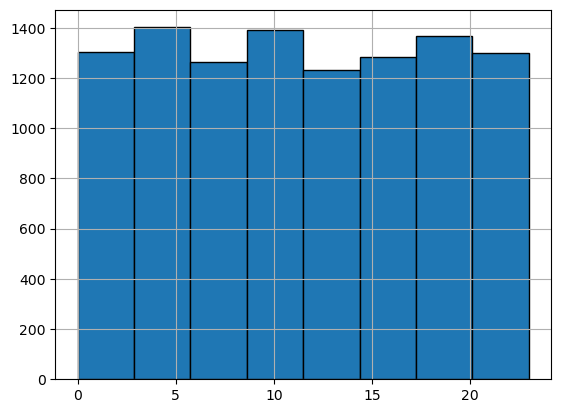

In [33]:
sample[sample['k_label']==1]['Transaction_Time'].hist(bins=8,edgecolor='black')

In [34]:
sample[sample['k_label']==1].describe()

,Age,Transaction_Time,Transaction_Amount,Account_Balance,Is_Fraud,k_label
count,10542.000000,10542.000000,10542.000000,10542.000000,10542.000000,10542.0
mean,44.192943,11.461108,49270.117431,52044.100500,0.051793,1.0
std,15.279968,6.944530,28442.645667,27345.532454,0.221619,0.0
min,18.000000,0.000000,34.230000,5026.350000,0.000000,1.0
25%,31.000000,5.000000,24558.075000,28662.255000,0.000000,1.0
50%,44.000000,11.000000,49418.025000,51600.275000,0.000000,1.0
75%,58.000000,18.000000,73494.320000,75682.785000,0.000000,1.0
max,70.000000,23.000000,98999.450000,99968.840000,1.000000,1.0


# silhouette score


between -1 and 1, the larger the better

In [35]:
X = sample_df
k_values = np.arange(2, 7)
silhouette_scores = []


for k in k_values:
    kmeans = KMeans(
        n_clusters=k, 
        init="k-means++", 
        random_state=42, 
        n_init=10
    )
    kmeans.fit(X)
    labels=kmeans.predict(X)
    score = silhouette_score(X, labels)
    silhouette_scores.append(score)
    print(f'k={k}, silhouette score={score:.4f}')

best_k = k_values[np.argmax(silhouette_scores)]
print(f'best k: {best_k}')

k=2, silhouette score=0.3625
k=3, silhouette score=0.2842
k=4, silhouette score=0.2450
k=5, silhouette score=0.2411
k=6, silhouette score=0.2511
best k: 2


with silhouette score we also see the best k is 2

In [46]:
kmeans = KMeans(
        n_clusters=2, 
        init="k-means++", 
        random_state=42, 
        n_init=10
    )
kmeans.fit(sample_df)
labels=kmeans.predict(sample_df)
label = pd.DataFrame(kmeans.labels_, columns=['k_label_score'])
sample= pd.concat([sample, label], axis=1)
sample

,Gender,Age,State,City,Bank_Branch,Account_Type,Transaction_Time,Transaction_Amount,Transaction_Type,Merchant_Category,Account_Balance,Transaction_Device,Transaction_Location,Device_Type,Is_Fraud,Transaction_Description,k_label,k_label_score
0,Female,70,Manipur,Churachandpur,Churachandpur Branch,Checking,21,73990.02,Bill Payment,Groceries,26998.49,POS Terminal,"Churachandpur, Manipur",Mobile,0,Subscription fee,1,1
1,Female,27,Himachal Pradesh,Shimla,Shimla Branch,Business,17,34258.19,Credit,Clothing,16474.66,Wearable Device,"Shimla, Himachal Pradesh",POS,0,Corporate event ticket,0,0
2,Female,35,Puducherry,Puducherry,Puducherry Branch,Business,0,35041.78,Withdrawal,Restaurant,79427.51,ATM Booth Kiosk,"Puducherry, Puducherry",Desktop,0,Insurance claim,0,0
3,Male,56,Chandigarh,Chandigarh,Chandigarh Branch,Savings,18,4070.99,Transfer,Entertainment,8459.75,Debit/Credit Card,"Chandigarh, Chandigarh",ATM,0,Childcare expense,1,1
4,Male,22,Gujarat,Ahmedabad,Ahmedabad Branch,Savings,19,13405.23,Bill Payment,Restaurant,71766.34,Virtual Card,"Ahmedabad, Gujarat",POS,0,Doctor consultation,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,Female,69,Andaman and Nicobar Islands,Car Nicobar,Car Nicobar Branch,Checking,13,31056.71,Bill Payment,Health,5296.41,Tablet,"Car Nicobar, Andaman and Nicobar Islands",POS,0,E-commerce refund,1,1
19996,Female,42,Andaman and Nicobar Islands,Port Blair,Port Blair Branch,Business,8,14942.40,Debit,Electronics,52448.73,Web Browser,"Port Blair, Andaman and Nicobar Islands",Mobile,0,Grocery shopping,0,0
19997,Female,28,Uttarakhand,Rishikesh,Rishikesh Branch,Checking,19,87493.47,Bill Payment,Clothing,5036.40,POS Mobile App,"Rishikesh, Uttarakhand",ATM,0,Hospital bill,0,0
19998,Female,25,Chhattisgarh,Bilaspur,Bilaspur Branch,Savings,17,19137.06,Withdrawal,Restaurant,86131.48,ATM,"Bilaspur, Chhattisgarh",Mobile,0,Gifts for family,1,1


<AxesSubplot:>

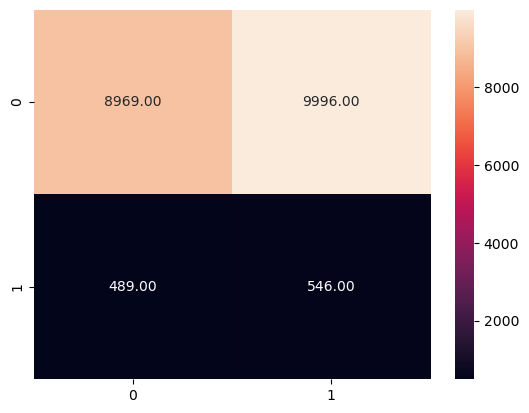

In [47]:
confusion=confusion_matrix(sample['Is_Fraud'], sample['k_label_score'])
sns.heatmap(confusion,annot=True,fmt='.2f')

with cluster we see that the fraud happens more in cluster 1 , although the cluster might not be so good more non_fraud is also in cluster1. This means the fraud and non_fraud have similar characteristic. We could see through the cluster to understand the characteristic to fraud later, which is the main goal.

next I will use other cluster method to see if I could get better results.

## DBSCAN

choose eps

from dbscan we see the cluster classify the data into 1 cluster automatically we can not use this to see the difference between fraud and non_fraud.

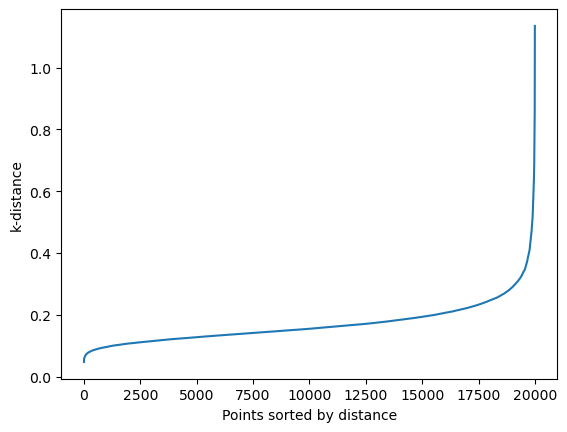

In [48]:
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import numpy as np
nbrs = NearestNeighbors(n_neighbors=5).fit(X) 
distances, indices = nbrs.kneighbors(X)
distances = np.sort(distances[:, -1], axis=0) 
plt.plot(distances)
plt.xlabel('Points sorted by distance')
plt.ylabel('k-distance')
plt.show()

In [49]:
dbscan=DBSCAN(eps=0.4,min_samples=4)
labels=dbscan.fit_predict(sample_df)
np.unique(labels)

array([-1,  0,  1,  2,  3])

In [50]:
label = pd.DataFrame(kmeans.labels_, columns=['dbscan_label'])
sample= pd.concat([sample, label], axis=1)
sample

,Gender,Age,State,City,Bank_Branch,Account_Type,Transaction_Time,Transaction_Amount,Transaction_Type,Merchant_Category,Account_Balance,Transaction_Device,Transaction_Location,Device_Type,Is_Fraud,Transaction_Description,k_label,k_label_score,dbscan_label
0,Female,70,Manipur,Churachandpur,Churachandpur Branch,Checking,21,73990.02,Bill Payment,Groceries,26998.49,POS Terminal,"Churachandpur, Manipur",Mobile,0,Subscription fee,1,1,1
1,Female,27,Himachal Pradesh,Shimla,Shimla Branch,Business,17,34258.19,Credit,Clothing,16474.66,Wearable Device,"Shimla, Himachal Pradesh",POS,0,Corporate event ticket,0,0,0
2,Female,35,Puducherry,Puducherry,Puducherry Branch,Business,0,35041.78,Withdrawal,Restaurant,79427.51,ATM Booth Kiosk,"Puducherry, Puducherry",Desktop,0,Insurance claim,0,0,0
3,Male,56,Chandigarh,Chandigarh,Chandigarh Branch,Savings,18,4070.99,Transfer,Entertainment,8459.75,Debit/Credit Card,"Chandigarh, Chandigarh",ATM,0,Childcare expense,1,1,1
4,Male,22,Gujarat,Ahmedabad,Ahmedabad Branch,Savings,19,13405.23,Bill Payment,Restaurant,71766.34,Virtual Card,"Ahmedabad, Gujarat",POS,0,Doctor consultation,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,Female,69,Andaman and Nicobar Islands,Car Nicobar,Car Nicobar Branch,Checking,13,31056.71,Bill Payment,Health,5296.41,Tablet,"Car Nicobar, Andaman and Nicobar Islands",POS,0,E-commerce refund,1,1,1
19996,Female,42,Andaman and Nicobar Islands,Port Blair,Port Blair Branch,Business,8,14942.40,Debit,Electronics,52448.73,Web Browser,"Port Blair, Andaman and Nicobar Islands",Mobile,0,Grocery shopping,0,0,0
19997,Female,28,Uttarakhand,Rishikesh,Rishikesh Branch,Checking,19,87493.47,Bill Payment,Clothing,5036.40,POS Mobile App,"Rishikesh, Uttarakhand",ATM,0,Hospital bill,0,0,0
19998,Female,25,Chhattisgarh,Bilaspur,Bilaspur Branch,Savings,17,19137.06,Withdrawal,Restaurant,86131.48,ATM,"Bilaspur, Chhattisgarh",Mobile,0,Gifts for family,1,1,1


In [51]:
sample[sample['Is_Fraud']==1]['dbscan_label'].value_counts()

1    546
0    489
Name: dbscan_label, dtype: int64

using dbscan we see that fraud locates in two group most in group 1 similar to kmeans

It's seems that cluster could not well categorize fraud and non-fraud or we need more data since I use sample to sample only 10% of data in the dataset to reduce time

based on the result, we can conclude that the fraud people are just like ordinary people 

cluster could not classify two group(fraud,non-fraud)

let's use cluster=2 to see what character fraud people in two groups have and what is the difference

group 1=more fraud 0=less fraud 

In [286]:
sample[(sample['k_label']==1 )&sample['Is_Fraud']==1]['City'].value_counts().head()

Chandigarh    45
Kavaratti     29
Champhai      13
Gwalior       12
Kolkata       11
Name: City, dtype: int64

In [288]:
sample[(sample['k_label']==0)&(sample['Is_Fraud']==1)]['City'].value_counts().head()

Shimla     14
Yanam      14
Ranchi     14
Thoubal    13
Tawang     13
Name: City, dtype: int64

In [287]:
sample[(sample['k_label']==1 )&(sample['Is_Fraud']==1)]['Account_Type'].value_counts()

Savings     199
Business    188
Checking    159
Name: Account_Type, dtype: int64

In [59]:
sample[(sample['k_label']==0 )&(sample['Is_Fraud']==1)]['Account_Type'].value_counts()

Business    169
Savings     165
Checking    155
Name: Account_Type, dtype: int64

In [60]:
sample[(sample['k_label']==1)&(sample['Is_Fraud']==1)]['Transaction_Time'].value_counts().head()

3     31
18    30
23    30
17    29
16    29
Name: Transaction_Time, dtype: int64

In [61]:
sample[(sample['k_label']==0)&(sample['Is_Fraud']==1)]['Transaction_Time'].value_counts().head()

2     33
6     27
15    25
8     24
1     24
Name: Transaction_Time, dtype: int64

In [62]:
sample[(sample['k_label']==1)&(sample['Is_Fraud']==1)]['Transaction_Type'].value_counts()

Debit           120
Transfer        114
Bill Payment    111
Credit          111
Withdrawal       90
Name: Transaction_Type, dtype: int64

In [63]:
sample[(sample['k_label']==0)&(sample['Is_Fraud']==1)]['Transaction_Type'].value_counts()

Debit           108
Credit          103
Bill Payment    102
Transfer         96
Withdrawal       80
Name: Transaction_Type, dtype: int64

In [64]:
sample[(sample['k_label']==1)&(sample['Is_Fraud']==1)]['Merchant_Category'].value_counts()

Groceries        100
Clothing          99
Restaurant        93
Health            91
Entertainment     87
Electronics       76
Name: Merchant_Category, dtype: int64

In [65]:
sample[(sample['k_label']==0)&(sample['Is_Fraud']==1)]['Merchant_Category'].value_counts()

Electronics      93
Restaurant       89
Groceries        82
Clothing         81
Entertainment    79
Health           65
Name: Merchant_Category, dtype: int64

In [66]:
sample[(sample['k_label']==1)&(sample['Is_Fraud']==1)]['Transaction_Device'].value_counts().head()

ATM Booth Kiosk                 62
Self-service Banking Machine    62
ATM                             45
Smart Card                      29
Wearable Device                 27
Name: Transaction_Device, dtype: int64

In [67]:
sample[(sample['k_label']==0)&(sample['Is_Fraud']==1)]['Transaction_Device'].value_counts().head()

Self-service Banking Machine    49
ATM                             49
ATM Booth Kiosk                 42
POS Mobile App                  33
Desktop/Laptop                  26
Name: Transaction_Device, dtype: int64

In [68]:
sample[(sample['k_label']==1)&(sample['Is_Fraud']==1)]['Device_Type'].value_counts()

ATM        142
Desktop    137
Mobile     137
POS        130
Name: Device_Type, dtype: int64

In [69]:
sample[(sample['k_label']==0)&(sample['Is_Fraud']==1)]['Device_Type'].value_counts()

ATM        130
Desktop    126
POS        121
Mobile     112
Name: Device_Type, dtype: int64

In [73]:
sample[(sample['k_label']==1)&(sample['Is_Fraud']==1)]['Transaction_Description'].value_counts().head()

Wedding anniversary gift      8
Bitcoin transaction           7
Tourist attraction payment    7
Department store shopping     7
Phone accessories             7
Name: Transaction_Description, dtype: int64

In [71]:
sample[(sample['k_label']==0)&(sample['Is_Fraud']==1)]['Transaction_Description'].value_counts().head()

Christmas shopping                7
Streaming service subscription    7
Transportation fare               7
Long-distance transport           7
Car service                       6
Name: Transaction_Description, dtype: int64

# result from analyzing the the two clusters:

Although the result is not what I expected, it also shows some additional information about fraud.  
It does not seperate data into fraud and non-fraud.  
Instead, it gives us some information about different fraud ways or location,etc.  
I will compare this two groups of fraud.

group1:  
1.loc: Chandigarh,Kavaratti   
2.account_type:Savings,Business accounts are used   
3.time:afternoon or midnight  
4.transation type :Debit,Transfer  
5.merchant type:groceries, clothing   
6.transaction device:ATM,self banking machine are used  
7.device:ATM,desktop  
8.event:Wedding anniversary gift,Bitcoin transaction,Tourist attraction payment,Department store shopping,Phone accessories          

group2:  
1.loc:Shimla,Yanam,Ranchi    
2.account type:business,savings    
3.time:morning,afternoon  
4.transaction type:debit,credit  
5.merchant type:electronic,restaurants  
6.transaction device:ATM,self banking machine are used  
7.device:ATM,desktop  
8.event:Christmas shopping,Streaming service subscription,Transportation fare,Long-distance transport,Car service               

conclusion:  
1.Although we do not have clusters as expected(fraud,non-fraud),there is also information about different fraud type.  
2.People living in different places might have different fraud behavior. This makes sense!  
3. bank in chandigarh or kavaratti should take transactions using business, savings account,happening at afternoon,midnight, using ATM and destop more carefully.  
4.bank at Shimla,Yanam,Ranchi should take transactions using business,saving, happening at morning,afternoon, using ATM, self banking machine more carefully.

next:  
1.use more data to run the cluster to get a better model(as it takes a lot of time and there are 200000 samples in the dataset)  
2.use it in classification model(random forest,decision tree, logistic regression) to help identify the fraud event  
3.use other clustering method(GMM, aggloramative cluster, mean shift) to see if we could get better result.
4.use other pca method(kernel pca) to see if it can improve the result.